C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


age             0
sex             0
SBP             0
BMI             0
HbA1c           0
TotalChol       0
LDL             0
TG              0
HDL             0
NLR             0
CRP          1510
CACS            0
CACS_high       0
dtype: int64
AUC: 0.8977453580901856
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        52
           1       0.91      0.94      0.93       290

    accuracy                           0.87       342
   macro avg       0.75      0.70      0.72       342
weighted avg       0.86      0.87      0.86       342



C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


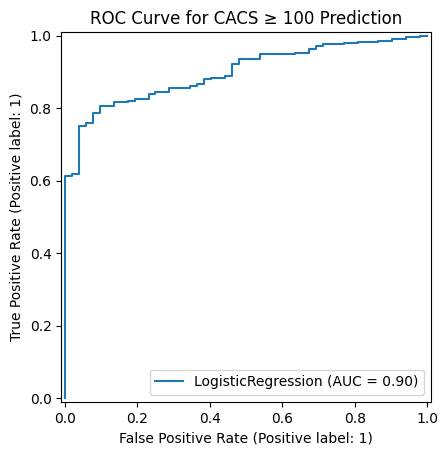

C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:35:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


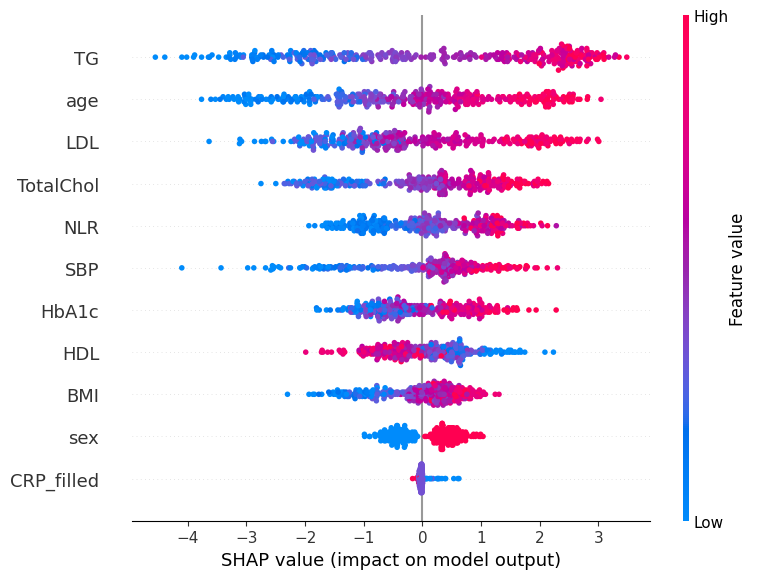

variable  coefficient direction  score
0          age     0.073099         +      5
1          sex     0.676060         +     10
2          SBP     0.045327         +      3
3          BMI     0.113153         +      7
4        HbA1c     0.416853         +     10
5    TotalChol     0.018890         +      1
6          LDL     0.028063         +      1
7           TG     0.021399         +      1
8          HDL    -0.037296         -      3
9          NLR     0.403666         +      7
10  CRP_filled    -0.058583         -      5

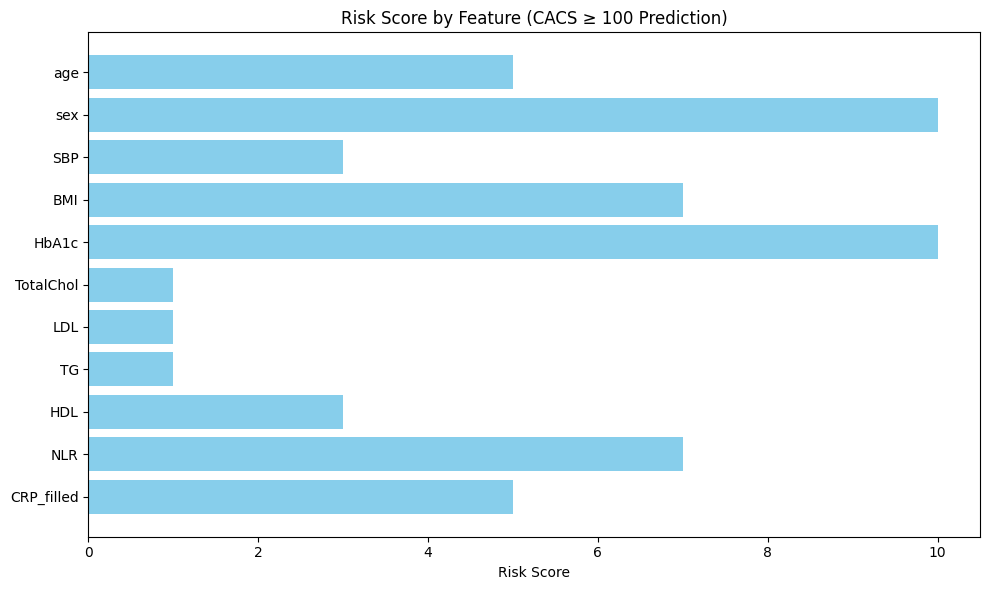

In [1]:
# üì¶ 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from xgboost import XGBClassifier

# üìÇ 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("CDW_CACS_NLR_CRP_1710.csv")  # Îã§Ïö¥Î°úÎìú Î∞õÏùÄ Í≤ΩÎ°ú ÌôïÏù∏ ÌïÑÏöî

# üîç 3. Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï≤òÎ¶¨ (CRPÎäî ÏùºÎ∂Ä Í≤∞Ï∏° ÌóàÏö©)
print(df.isnull().sum())

# üí° CRPÎäî ÌèâÍ∑† ÎåÄÏ≤¥ ÎòêÎäî Î≥ÑÎèÑ Î≥ÄÏàòÎ°ú Í≤∞Ï∏° Ïó¨Î∂Ä Î∞òÏòÅ Í∞ÄÎä•
df["CRP_filled"] = df["CRP"].fillna(df["CRP"].mean())

# üéØ 4. ÌîºÏ≤ò/ÌÉÄÍ≤ü ÏÑ§Ï†ï
X = df[["age", "sex", "SBP", "BMI", "HbA1c", "TotalChol", "LDL", "TG", "HDL", "NLR", "CRP_filled"]]
y = df["CACS_high"]

# ‚úÇÔ∏è 5. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üìä 6. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve for CACS ‚â• 100 Prediction")
plt.show()

# üìà 7. SHAP Î∂ÑÏÑù (XGBoost)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

shap.initjs()
shap.summary_plot(shap_values, X_test)       # Ï†ÑÏ≤¥ Î≥ÄÏàò ÏòÅÌñ•ÎèÑ
shap.force_plot(shap_values[0])              # Í∞úÎ≥Ñ ÌôòÏûê ÏòàÏ∏° Ìï¥ÏÑù

# üßÆ 8. Î¶¨Ïä§ÌÅ¨ Ï†êÏàò ÏãúÏä§ÌÖú ÏÉùÏÑ±
coef_df = pd.DataFrame({
    "variable": X.columns,
    "coefficient": model.coef_[0]
})
coef_df["score"] = pd.qcut(coef_df["coefficient"].abs(), q=5, labels=[1, 3, 5, 7, 10]).astype(int)
coef_df["direction"] = coef_df["coefficient"].apply(lambda x: "+" if x > 0 else "-")
score_table = coef_df[["variable", "coefficient", "direction", "score"]]
display(score_table)

# üìä 9. Ï†êÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(score_table["variable"], score_table["score"], color="skyblue")
plt.xlabel("Risk Score")
plt.title("Risk Score by Feature (CACS ‚â• 100 Prediction)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
